Vmax: 28.87 V


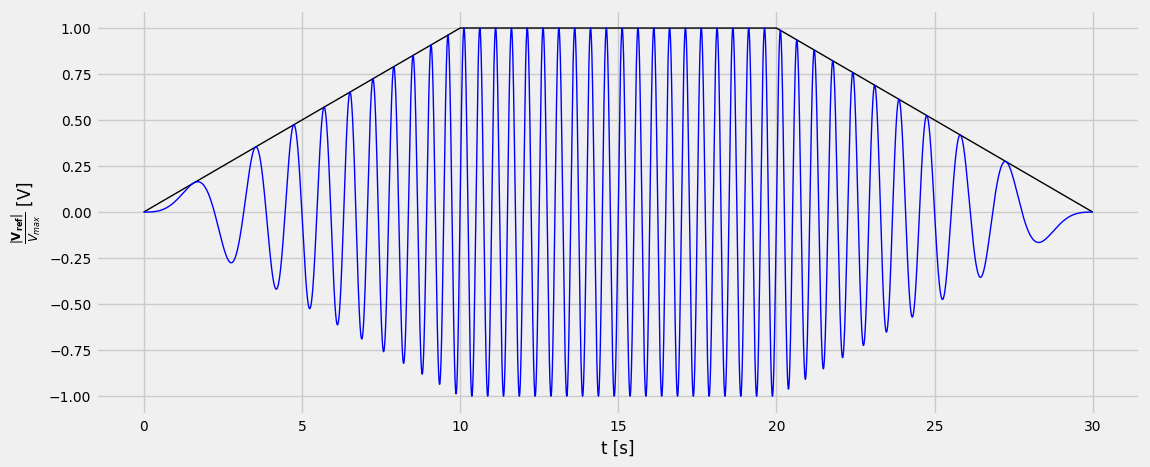

In [90]:
import numpy as np
from numpy import pi, sin, cos, arcsin, arccos
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from svpwm import SVPWM


plt.style.use(['default', 'fivethirtyeight'])
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 10

w

def trapez(x, t0, t1, t2, t3):
    y=np.ones_like(x)
    y = np.fmin((x-t0) / (t1 - t0), (t3-x) / (t3 - t2))
    y = np.fmin(y, 1)
    y = np.fmax(y, 0)
    return y
    
    
f_out = 2
f_pwm = 10.0e3
f_update = 2000.0
Vdc = 50.0
Vm = 22
Vmmax = np.sqrt(3)/3.0 * Vdc
w = 2*pi*f_out
print("Vmax: {:.2f} V".format(Vmmax))

t0 = 0
t1 = 10
t2 = 20
t3 = 30
t = np.linspace(0, 30, 10001)
fi = odeint(lambda y, x: trapez(x, t0, t1, t2, t3), 0, t)

y1 = trapez(t, t0, t1, t2, t3)
y2 = y1 * sin(w*fi).ravel()


fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(t, y1, 'k-', linewidth=1);
ax.plot(t, y2, 'b', linewidth=1);
ax.set_xlabel("t [s]")
ax.set_ylabel(r"$\frac{|\mathbf{V_{ref}}|}{V_{max}}$ [V]");

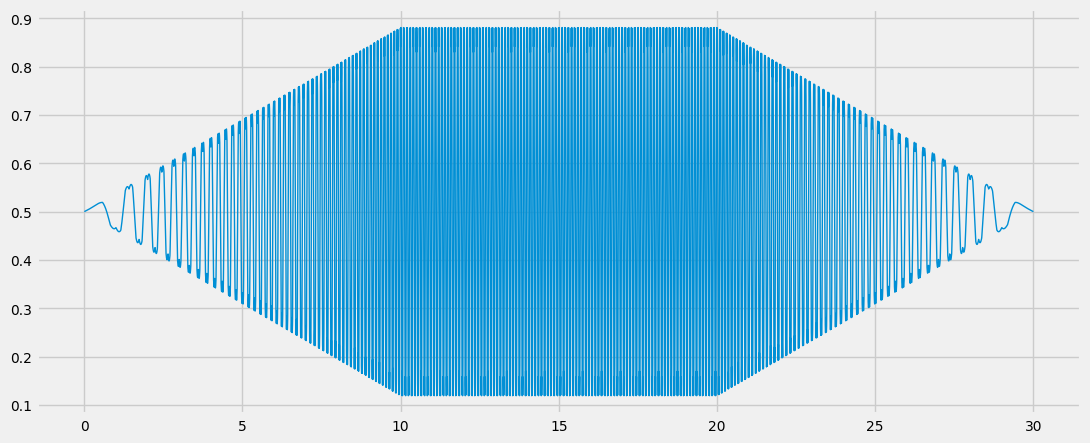

In [89]:
pwm = SVPWM(Vdc, 1/f_update)
dcs = np.zeros((t.shape[0], 3))

for i in range(t.shape[0]):
    Vrefx = Vm * y1[i] * cos(w*fi[i])
    Vrefy = Vm * y1[i] * sin(w*fi[i])
    Vref = np.array([Vrefx, Vrefy]).ravel()
    dcs[i] = pwm.getDC(Vref)
    


    plt.figure(figsize=(12, 5))
plt.plot(t, dcs[:, 0], linewidth=1);

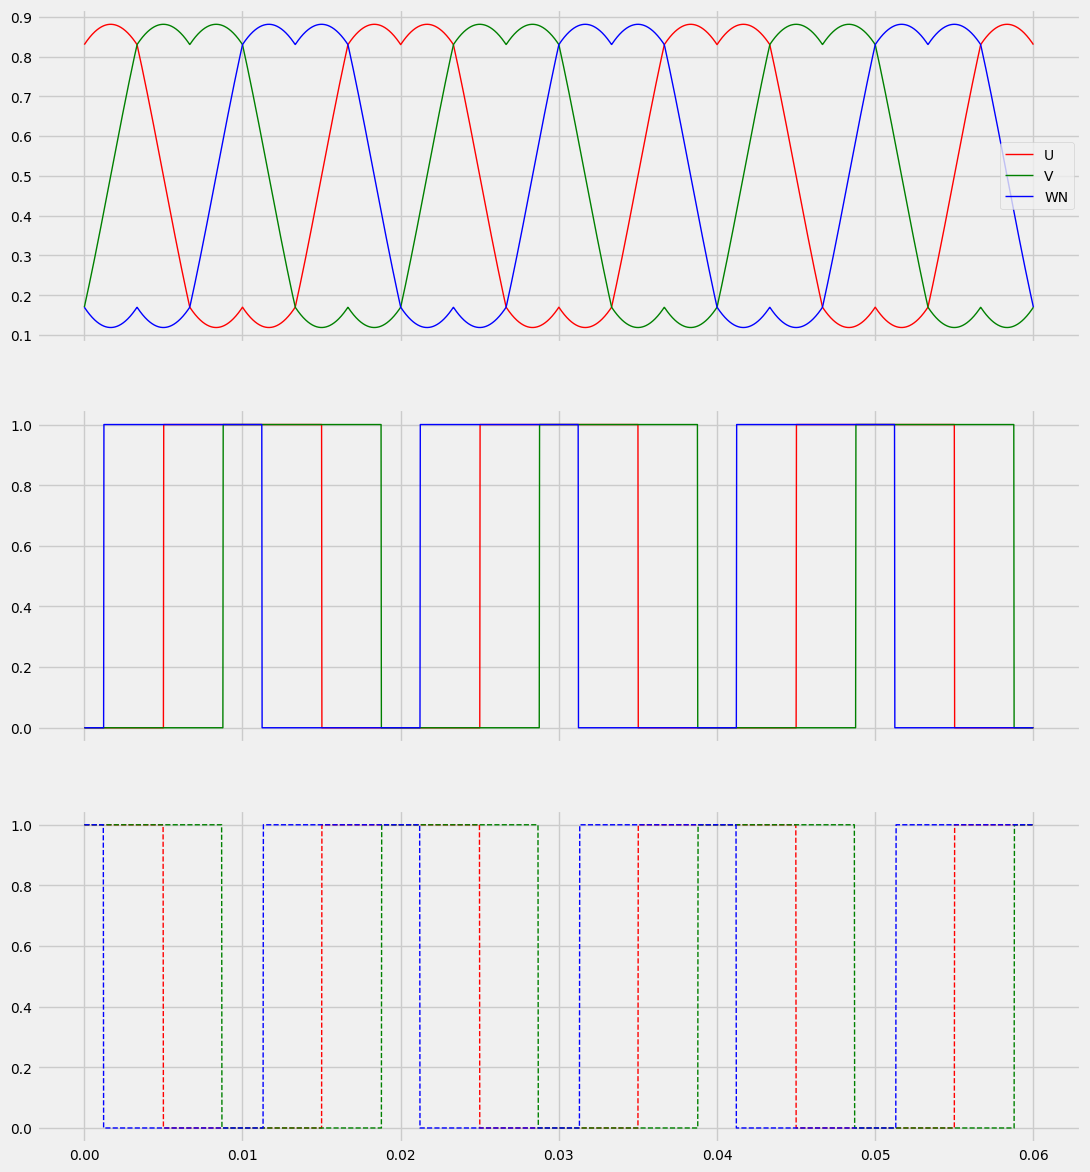

In [152]:
def tri(x, a=1, p=1/50):
    return a/np.pi*np.arcsin(np.sin(2*np.pi/p*x-np.pi/2))+a/2

pwm = SVPWM(Vdc, 1/f_update)
w = 2 * pi * 50
t = np.linspace(0, 60e-3, 3001)

dcU = np.zeros_like(t)
dcV = np.zeros_like(t)
dcW = np.zeros_like(t)

pwmU = np.zeros_like(t)
pwmV = np.zeros_like(t)
pwmW = np.zeros_like(t)

pwmUN = np.zeros_like(t)
pwmVN = np.zeros_like(t)
pwmWN = np.zeros_like(t)


for i in range(t.shape[0]):
    Vrefx = Vm * cos(w*t[i])
    Vrefy = Vm * sin(w*t[i])
    Vref = np.array([Vrefx, Vrefy]).ravel()
    dcs = pwm.getDC(Vref)
    
    dcU[i] = dcs[0]
    dcV[i] = dcs[1]
    dcW[i] = dcs[2]
    

idx = dcU <= tri(t, 1.0)
pwmU[idx] = 1.0

idx = dcU >= tri(t, 1.01)
pwmUN[idx] = 1.0

idx = dcV <= tri(t, 1.0)
pwmV[idx] = 1.0

idx = dcV >= tri(t, 1.01)
pwmVN[idx] = 1.0

idx = dcW <= tri(t, 1.0)
pwmW[idx] = 1.0

idx = dcW >= tri(t, 1.01)
pwmWN[idx] = 1.0

fig, ax = plt.subplots(3, 1, figsize=(12, 14), sharex=True)
ax[0].plot(t, dcU, 'r-', linewidth=1);
ax[0].plot(t, dcV, 'g-', linewidth=1);
ax[0].plot(t, dcW, 'b-', linewidth=1);
ax[0].legend(['U', 'V', 'WN'])

ax[1].plot(t, pwmU, 'r-', linewidth=1);
ax[2].plot(t, pwmUN, 'r--', linewidth=1);

ax[1].plot(t, pwmV, 'g-', linewidth=1);
ax[2].plot(t, pwmVN, 'g--', linewidth=1);

ax[1].plot(t, pwmW, 'b-', linewidth=1);
ax[2].plot(t, pwmWN, 'b--', linewidth=1);